# TRIADB-TriaClick Northwind Demo
## Mapping, Importing and Loading

#### © October 2019 By Athanassios I. Hatzis

### Rebuild Data Storage

In [1]:
from triadb import MIS
from IPython.display import Image

mis = MIS(debug=1, rebuild=False, what='data')

mis.connect_to_metastore(dbms='mariadb', host='localhost', port=3306,
                         user='demo', password='demo', database='TRIADB', trace=0)

mis.connect_to_datastore(dbms='clickhouse', host='localhost', port=9000,
                         user='demo', password='demo', database='TriaDB', trace=0)


TRIADB v0.9 Self-Service Data Management and Analytics Framework
(C) 2015-2019 Athanassios I. Hatzis

TriaClick Associative Semiotic Hypergraph Engine based on ClickHouse and MariaDB DBMS
(C) 2018-2019 Athanassios I. Hatzis

Python 3.7.3 | packaged by conda-forge | (default, Jul  1 2019, 21:52:21) 
[GCC 7.3.0] on linux
Session Started on  Fri, 18 Oct 2019 10:15:29 +0000


DataDB:ClickHouse(host = localhost, port = 9000, database = TriaDB)

## Overview of Data-Sets and Data-Models

In [2]:
mis.get(what='datasets')

nID  dim4  dim3  dim2                                   cname      alias ntype  ctype  counter
0    5     1   121     0                        JSON Data Models    JSON_DM    DS    SDM        5
1  179     1   242     0        Supplier Part Catalogue in MySQL  SPC_MySQL    DS  MYSQL        3
2  200     1   363     0                       Northwind Traders  NORTHWIND    DS  MYSQL        8
3  285     1   484     0  Supplier Part Catalogue TSV flat files    SPC_TSV    DS    TSV        3

In [3]:
mis.get(what='models')

nID  dim4  dim3  dim2                      cname       alias ntype ctype  counter
0   11     2   100     0      Northwind Traders ERD   NORTHWIND    DM  <NA>       77
1   89     2   200     0              PHYSICIAN CMS    PHYS CMS    DM  <NA>       42
2  132     2   300     0  SUPPLIER PART CATALOG ALL     SPC_ALL    DM  <NA>       16
3  149     2   400     0    BICYCLE TRIPS 2010-2018  BIKE_TRIPS    DM  <NA>       10
4  160     2   500     0    Supplier Part Catalogue         SPC    DM  <NA>       18

## Select DataModel and DataSet

In [4]:
mis.restart(100, 363)
print(mis)

MIS(
	MetaDB:MariaDB(host = localhost, port = 3306, database = TRIADB), 
	DataDB:ClickHouse(host = localhost, port = 9000, database = TriaDB), 
	DMS:DM:(100, 0) is Northwind Traders ERD (NORTHWIND) # = 77, 
	DRS:DS:(363, 0) is Northwind Traders (NORTHWIND) # = 8  )


## Entity-Relationship Diagram

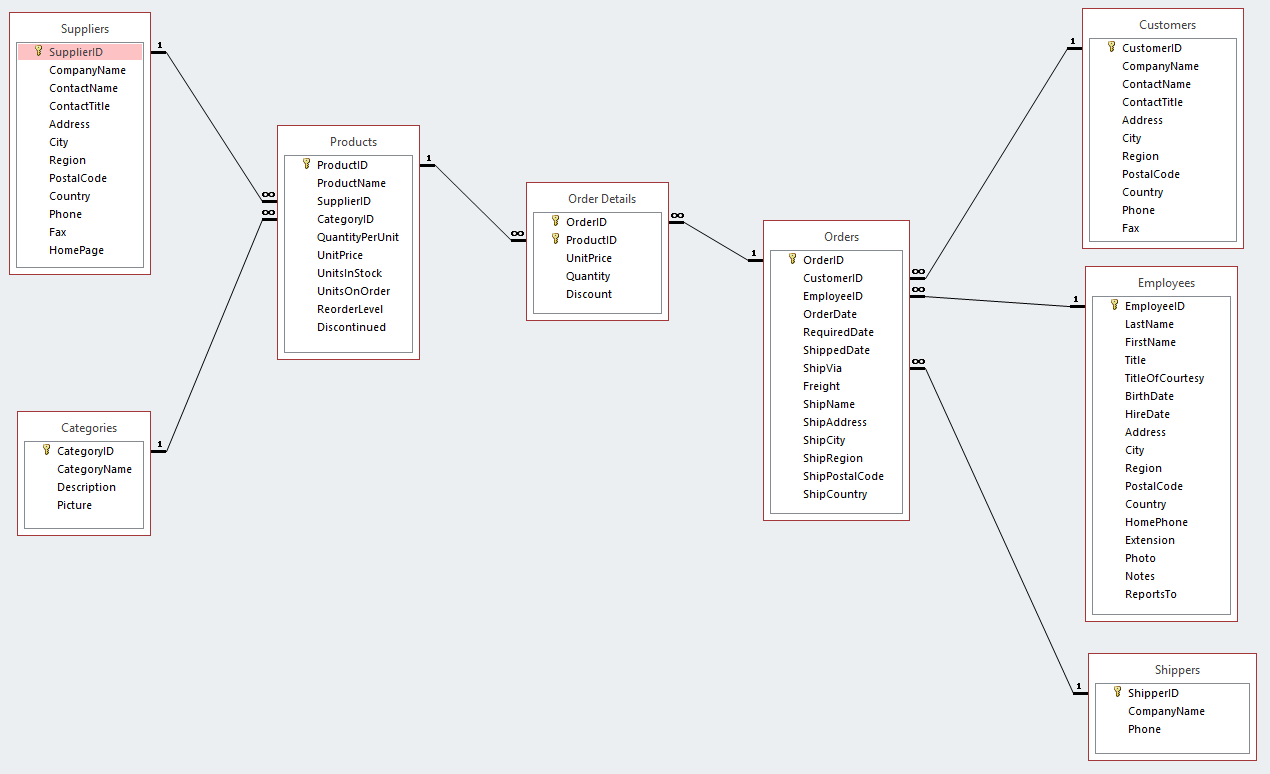

In [5]:
Image('Northwind_MSAccess_schema.png')

## Tables

In [6]:
mis.drs.get_tables()

dim4  dim3  dim2         cname       alias ntype  ctype  counter  path         db
0     1   363     1    Categories  00363_0001   TBL  MYSQL        3  <NA>  Northwind
1     1   363     2     Customers  00363_0002   TBL  MYSQL       11  <NA>  Northwind
2     1   363     3     Employees  00363_0003   TBL  MYSQL       18  <NA>  Northwind
3     1   363     4  OrderDetails  00363_0004   TBL  MYSQL        5  <NA>  Northwind
4     1   363     5        Orders  00363_0005   TBL  MYSQL       14  <NA>  Northwind
5     1   363     6      Products  00363_0006   TBL  MYSQL       10  <NA>  Northwind
6     1   363     7      Shippers  00363_0007   TBL  MYSQL        3  <NA>  Northwind
7     1   363     8     Suppliers  00363_0008   TBL  MYSQL       12  <NA>  Northwind

## Entities

In [7]:
mis.dms.get_entities()

dim4  dim3  dim2         cname alias ntype ctype  counter
0     2   100     1      Supplier   Sup   ENT    HB        0
1     2   100    13      Category   Cat   ENT    HB        0
2     2   100    16       Product   Pro   ENT    HB        0
3     2   100    24  OrderDetails  Odet   ENT    HB        0
4     2   100    28         Order   Ord   ENT    HB        0
5     2   100    39      Employee   Emp   ENT    HB        0
6     2   100    57      Customer  Cust   ENT    HB        0
7     2   100    68       Shipper  Ship   ENT    HB        0

## Mapping

In [14]:
mis.reset_mapping()

Mapping pairs have been reset: []


### Mapping Fields of Product Table onto Attributes of Product Entity

In [15]:
mis.match_fields_with_attributes(16, 363, 6)

cname  nID  nID           alias
0        ProductID  260   28          p_name
1      ProductName  261   29      p_quantity
2       SupplierID  262   30         p_price
3       CategoryID  263   31         p_stock
4  QuantityPerUnit  264   32         p_order
5        UnitPrice  265   33       p_reorder
6     UnitsInStock  266   34  p_discontinued
7     UnitsOnOrder  267   82            s_id
8     ReorderLevel  268   83          cat_id
9     Discontinued  269   84            p_id

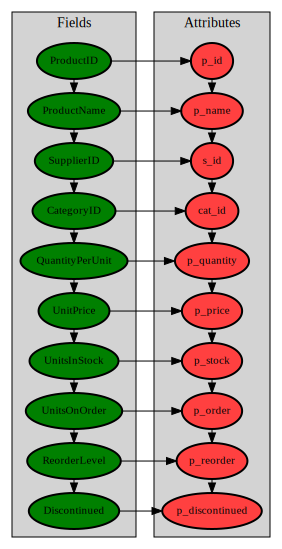

In [16]:
mis.engine.compare_fields_with_attributes([
 (260, 84),
 (261, 28),
 (262, 82),
 (263, 83),
 (264, 29),
 (265, 30),
 (266, 31),
 (267, 32),
 (268, 33),
 (269, 34),], graph=True)

### Mapping Fields of Customer Table onto Attributes of Customer Entity

In [17]:
mis.match_fields_with_attributes(57, 363, 2)

cname  nID  nID      alias
0     CustomerID  212   69  c_company
1    CompanyName  213   70  c_contact
2    ContactName  214   71    c_title
3   ContactTitle  215   72  c_address
4        Address  216   73     c_city
5           City  217   74   c_region
6         Region  218   75   c_postal
7     PostalCode  219   76  c_country
8        Country  220   77    c_phone
9          Phone  221   78      c_fax
10           Fax  222   87       c_id

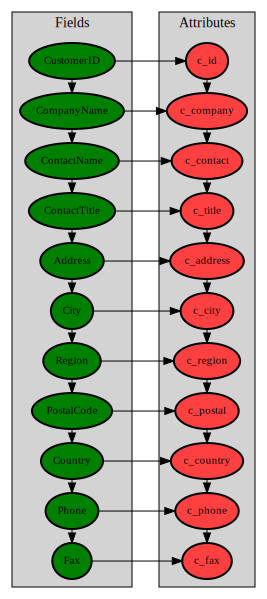

In [18]:
mis.engine.compare_fields_with_attributes([
 (212, 87),
 (213, 69),
 (214, 70),
 (215, 71),
 (216, 72),
 (217, 73),
 (218, 74),
 (219, 75),
 (220, 76),
 (221, 77),
 (222, 78),], graph=True)

### Mapping Fields of Category Table onto Attributes of Category Entity

In [19]:
mis.match_fields_with_attributes(13, 363, 1)

cname  nID  nID            alias
0    CategoryID  209   25         cat_name
1  CategoryName  210   26  cat_description
2   Description  211   83           cat_id

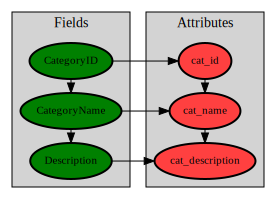

In [20]:
mis.engine.compare_fields_with_attributes([
 (209, 83),
 (210, 25),
 (211, 26),], graph=True)

### Mapping Fields of Supplier Table onto Attributes of Supplier Entity

In [21]:
mis.match_fields_with_attributes(1, 363, 8)

cname  nID  nID       alias
0     SupplierID  273   13   s_company
1    CompanyName  274   14   s_contact
2    ContactName  275   15     s_title
3   ContactTitle  276   16   s_address
4        Address  277   17      s_city
5           City  278   18    s_region
6         Region  279   19    s_postal
7     PostalCode  280   20   s_country
8        Country  281   21     s_phone
9          Phone  282   22       s_fax
10           Fax  283   23  s_homepage
11      HomePage  284   82        s_id

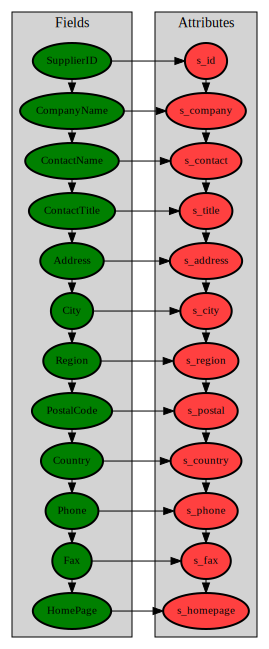

In [22]:
mis.engine.compare_fields_with_attributes([
 (273, 82),
 (274, 13),
 (275, 14),
 (276, 15),
 (277, 16),
 (278, 17),
 (279, 18),
 (280, 19),
 (281, 20),
 (282, 21),
 (283, 22),
 (284, 23)], graph=True)

### Mapping Fields of OrderDetails Table onto Attributes of OrderDetails Entity

In [23]:
mis.match_fields_with_attributes(24, 363, 4)

cname  nID  nID          alias
0    OrderID  241   36     odet_price
1  ProductID  242   37  odet_quantity
2  UnitPrice  243   38  odet_discount
3   Quantity  244   84           p_id
4   Discount  245   85           o_id

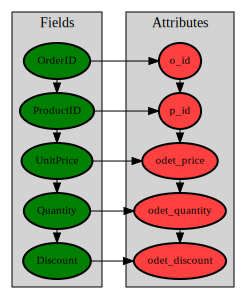

In [24]:
mis.engine.compare_fields_with_attributes([
 (241, 85),
 (242, 84),
 (243, 36),
 (244, 37),
 (245, 38),], graph=True)

### Mapping Fields of Order Table onto Attributes of Order Entity

In [25]:
mis.match_fields_with_attributes(28, 363, 5)

cname  nID  nID       alias
0          OrderID  246   40      o_date
1       CustomerID  247   41  o_required
2       EmployeeID  248   42   o_shipped
3        OrderDate  249   43   o_freight
4     RequiredDate  250   44      o_name
5      ShippedDate  251   45   o_address
6          ShipVia  252   46      o_city
7          Freight  253   47    o_region
8         ShipName  254   48    o_postal
9      ShipAddress  255   49   o_country
10        ShipCity  256   85        o_id
11      ShipRegion  257   86        e_id
12  ShipPostalCode  258   87        c_id
13     ShipCountry  259   88       sh_id

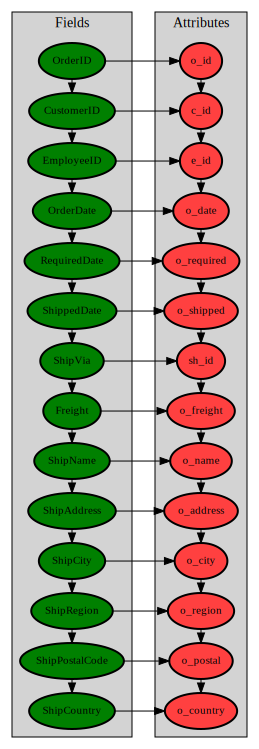

In [26]:
mis.engine.compare_fields_with_attributes([
 (246, 85),
 (247, 87),
 (248, 86),
 (249, 40),
 (250, 41),
 (251, 42),
 (252, 88),
 (253, 43),
 (254, 44),
 (255, 45),
 (256, 46),
 (257, 47),
 (258, 48),
 (259, 49),], graph=True)

### Mapping Fields of Employee Table onto Attributes of Employee Entity

In [27]:
mis.match_fields_with_attributes(39, 363, 3)

cname  nID  nID         alias
0        EmployeeID  223   51        e_last
1          LastName  224   52       e_first
2         FirstName  225   53       e_title
3             Title  226   54  e_titlecourt
4   TitleOfCourtesy  227   55       e_birth
5         BirthDate  228   56        e_hire
6          HireDate  229   57     e_address
7           Address  230   58        e_city
8              City  231   59      e_region
9            Region  232   60      e_postal
10       PostalCode  233   61     e_country
11          Country  234   62   e_homephone
12        HomePhone  235   63   e_extension
13        Extension  236   64       e_notes
14            Notes  237   65     e_reports
15        ReportsTo  238   66   e_photopath
16        PhotoPath  239   67      e_salary
17           Salary  240   86          e_id

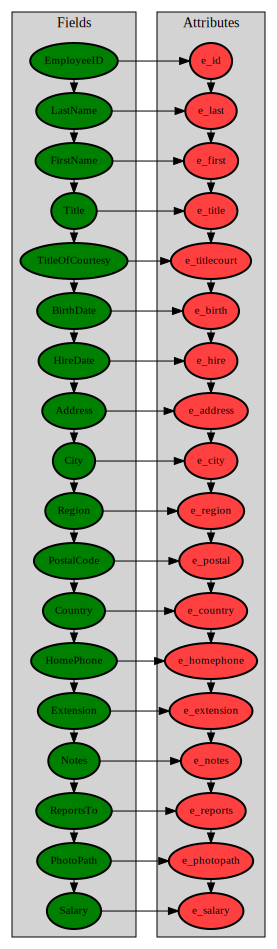

In [28]:
mis.engine.compare_fields_with_attributes([
 (223, 86),
 (224, 51),
 (225, 52),
 (226, 53),
 (227, 54),
 (228, 55),
 (229, 56),
 (230, 57),
 (231, 58),
 (232, 59),
 (233, 60),
 (234, 61),
 (235, 62),
 (236, 63),
 (237, 64),
 (238, 65),
 (239, 66),
 (240, 67),], graph=True)

### Mapping Fields of Shipper Table onto Attributes of Shipper Entity

In [29]:
mis.match_fields_with_attributes(68, 363, 7)

cname  nID  nID       alias
0    ShipperID  270   80  sh_company
1  CompanyName  271   81    sh_phone
2        Phone  272   88       sh_id

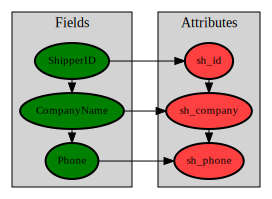

In [30]:
mis.engine.compare_fields_with_attributes([
 (270, 88),
 (271, 80),
 (272, 81),], graph=True)

### Add Mapping

In [31]:
mis.add_mapping()

(2, 100, 13)

### Verify Mapping

In [32]:
mis.drs.get_fields(extras='attribute, table')

nID  dim4  dim3  dim2            cname       alias ntype  ctype  counter                             attribute            table
0   209     1   363     9       CategoryID  00363_0009   FLD  MYSQL        0           [ATTR:(2, 100, 72), cat_id]  TBL:(1, 363, 1)
1   210     1   363    10     CategoryName  00363_0010   FLD  MYSQL        0         [ATTR:(2, 100, 14), cat_name]  TBL:(1, 363, 1)
2   211     1   363    11      Description  00363_0011   FLD  MYSQL        0  [ATTR:(2, 100, 15), cat_description]  TBL:(1, 363, 1)
3   212     1   363    12       CustomerID  00363_0012   FLD  MYSQL        0             [ATTR:(2, 100, 76), c_id]  TBL:(1, 363, 2)
4   213     1   363    13      CompanyName  00363_0013   FLD  MYSQL        0        [ATTR:(2, 100, 58), c_company]  TBL:(1, 363, 2)
5   214     1   363    14      ContactName  00363_0014   FLD  MYSQL        0        [ATTR:(2, 100, 59), c_contact]  TBL:(1, 363, 2)
6   215     1   363    15     ContactTitle  00363_0015   FLD  MYSQL        0          [ATTR:(2, 100, 60), c_title]  TBL:(1, 363, 2)
7   216     1   363    16          Address  00363_0016   FLD  MYSQL        0        [ATTR:(2, 100, 61), c_address]  TBL:(1, 363, 2)
8   217     1   363    17             City  00363_0017   FLD  MYSQL        0           [ATTR:(2, 100, 62), c_city]  TBL:(1, 363, 2)
9   218     1   363    18           Region  00363_0018   FLD  MYSQL        0         [ATTR:(2, 100, 63), c_region]  TBL:(1, 363, 2)
10  219     1   363    19       PostalCode  00363_0019   FLD  MYSQL        0         [ATTR:(2, 100, 64), c_postal]  TBL:(1, 363, 2)
11  220     1   363    20          Country  00363_0020   FLD  MYSQL        0        [ATTR:(2, 100, 65), c_country]  TBL:(1, 363, 2)
12  221     1   363    21            Phone  00363_0021   FLD  MYSQL        0          [ATTR:(2, 100, 66), c_phone]  TBL:(1, 363, 2)
13  222     1   363    22              Fax  00363_0022   FLD  MYSQL        0            [ATTR:(2, 100, 67), c_fax]  TBL:(1, 363, 2)
14  223     1   363    23       EmployeeID  00363_0023   FLD  MYSQL        0             [ATTR:(2, 100, 75), e_id]  TBL:(1, 363, 3)
15  224     1   363    24         LastName  00363_0024   FLD  MYSQL        0           [ATTR:(2, 100, 40), e_last]  TBL:(1, 363, 3)
16  225     1   363    25        FirstName  00363_0025   FLD  MYSQL        0          [ATTR:(2, 100, 41), e_first]  TBL:(1, 363, 3)
17  226     1   363    26            Title  00363_0026   FLD  MYSQL        0          [ATTR:(2, 100, 42), e_title]  TBL:(1, 363, 3)
18  227     1   363    27  TitleOfCourtesy  00363_0027   FLD  MYSQL        0     [ATTR:(2, 100, 43), e_titlecourt]  TBL:(1, 363, 3)
19  228     1   363    28        BirthDate  00363_0028   FLD  MYSQL        0          [ATTR:(2, 100, 44), e_birth]  TBL:(1, 363, 3)
20  229     1   363    29         HireDate  00363_0029   FLD  MYSQL        0           [ATTR:(2, 100, 45), e_hire]  TBL:(1, 363, 3)
21  230     1   363    30          Address  00363_0030   FLD  MYSQL        0        [ATTR:(2, 100, 46), e_address]  TBL:(1, 363, 3)
22  231     1   363    31             City  00363_0031   FLD  MYSQL        0           [ATTR:(2, 100, 47), e_city]  TBL:(1, 363, 3)
23  232     1   363    32           Region  00363_0032   FLD  MYSQL        0         [ATTR:(2, 100, 48), e_region]  TBL:(1, 363, 3)
24  233     1   363    33       PostalCode  00363_0033   FLD  MYSQL        0         [ATTR:(2, 100, 49), e_postal]  TBL:(1, 363, 3)
25  234     1   363    34          Country  00363_0034   FLD  MYSQL        0        [ATTR:(2, 100, 50), e_country]  TBL:(1, 363, 3)
26  235     1   363    35        HomePhone  00363_0035   FLD  MYSQL        0      [ATTR:(2, 100, 51), e_homephone]  TBL:(1, 363, 3)
27  236     1   363    36        Extension  00363_0036   FLD  MYSQL        0      [ATTR:(2, 100, 52), e_extension]  TBL:(1, 363, 3)
28  237     1   363    37            Notes  00363_0037   FLD  MYSQL        0          [ATTR:(2, 100, 53), e_notes]  TBL:(1, 363, 3)
29  238     1   363    38        ReportsTo  

In [33]:
mis.dms.get_attributes()

dim4  dim3  dim2            cname            alias ntype    vtype  junction                                 descr                                fields                              entities
0      2   100     2      CompanyName        s_company  ATTR   String         0                          company name                    [FLD:(1, 363, 74)]                     [ENT:(2, 100, 1)]
1      2   100     3      ContactName        s_contact  ATTR   String         0                          contact name                    [FLD:(1, 363, 75)]                     [ENT:(2, 100, 1)]
2      2   100     4     ContactTitle          s_title  ATTR   String         0                         contact title                    [FLD:(1, 363, 76)]                     [ENT:(2, 100, 1)]
3      2   100     5          Address        s_address  ATTR   String         0                      supplier address                    [FLD:(1, 363, 77)]                     [ENT:(2, 100, 1)]
4      2   100     6             City           s_city  ATTR   String         0                         supplier city                    [FLD:(1, 363, 78)]                     [ENT:(2, 100, 1)]
5      2   100     7           Region         s_region  ATTR   String         0                       supplier region                    [FLD:(1, 363, 79)]                     [ENT:(2, 100, 1)]
6      2   100     8       PostalCode         s_postal  ATTR   String         0                  supplier postal code                    [FLD:(1, 363, 80)]                     [ENT:(2, 100, 1)]
7      2   100     9          Country        s_country  ATTR   String         0                      supplier country                    [FLD:(1, 363, 81)]                     [ENT:(2, 100, 1)]
8      2   100    10            Phone          s_phone  ATTR   String         0                        supplier phone                    [FLD:(1, 363, 82)]                     [ENT:(2, 100, 1)]
9      2   100    11              Fax            s_fax  ATTR   String         0                          supplier fax                    [FLD:(1, 363, 83)]                     [ENT:(2, 100, 1)]
10     2   100    12         HomePage       s_homepage  ATTR   String         0                    supplier home page                    [FLD:(1, 363, 84)]                     [ENT:(2, 100, 1)]
11     2   100    14     CategoryName         cat_name  ATTR   String         0                         category name                    [FLD:(1, 363, 10)]                    [ENT:(2, 100, 13)]
12     2   100    15      Description  cat_description  ATTR   String         0                  category description                    [FLD:(1, 363, 11)]                    [ENT:(2, 100, 13)]
13     2   100    17      ProductName           p_name  ATTR   String         0                          product name                    [FLD:(1, 363, 61)]                    [ENT:(2, 100, 16)]
14     2   100    18  QuantityPerUnit       p_quantity  ATTR   String         0  product packaging: quantity per unit                    [FLD:(1, 363, 64)]                    [ENT:(2, 100, 16)]
15     2   100    19        UnitPrice          p_price  ATTR  Float32         0                    product unit price                    [FLD:(1, 363, 65)]                    [ENT:(2, 100, 16)]
16     2   100    20     UnitsInStock          p_stock  ATTR   UInt16         0                product units in stock                    [FLD:(1, 363, 66)]                    [ENT:(2, 100, 16)]
17     2   100    21     UnitsOnOrder          p_order  ATTR   UInt16         0                product units on order                    [FLD:(1, 363, 67)]                    [ENT:(2, 100, 16)]
18     2   100    22     ReorderLevel        p_reorder  ATTR   UInt16         0                 product reorder level                    [FLD:(1, 363, 68)]                    [ENT:(2, 100, 16)]
19     2   100    23     Discontinued   p_discontinued  ATTR    UInt8         0                  product discontinued       

## Importing Data from MYSQL tables to ClickHouse Table Engines

In [34]:
mis.import_data()


┃▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔ STARTED ▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔┃

Importing data from data set is completed:
DRS:DS:(363, 0) is Northwind Traders (NORTHWIND) # = 8
Total rows imported: 3202
Total time elapsed : 2.69 sec

⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗ FINISHED IMPORTING DATA ⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗


29

## Loading ClickHouse HyperGraph Engines

In [35]:
mis.load_data()


┃▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔ STARTED ▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔┃

Building stage of datatype dictionary engines and hypergraph engines is completed.
▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄▄

Loading data from data resources is completed:
DRS:DS:(363, 0) is Northwind Traders (NORTHWIND) # = 8
Elapsed: 4.24 sec

⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗ FINISHED LOADING ⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗

┃▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔ STARTED ▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔▔┃
Rebuild of states engine HAtom_100States is completed:
Elapsed: 0.522 sec

⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗ FINISHED REBUILD OF STATES ENGINE ⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗⫗


In [41]:
mis.get_asets()

{(100, 1): ASET(100, 1)[Sup] = 29 hbonds,
 (100, 13): ASET(100, 13)[Cat] = 8 hbonds,
 (100, 16): ASET(100, 16)[Pro] = 77 hbonds,
 (100, 24): ASET(100, 24)[Odet] = 2155 hbonds,
 (100, 28): ASET(100, 28)[Ord] = 830 hbonds,
 (100, 39): ASET(100, 39)[Emp] = 9 hbonds,
 (100, 57): ASET(100, 57)[Cust] = 91 hbonds,
 (100, 68): ASET(100, 68)[Ship] = 3 hbonds}